In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:3]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-farm-distracted-driver-detection/sample_submission.csv
/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_96590.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_32366.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_99675.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_68208.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_77583.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_49189.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c7/img_13562.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c7/img_233.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c7/img_77160.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_55262.jpg
/kaggle/input/state-farm-distracted-driver-detection/im

In [12]:
import glob 
glob.glob('/kaggle/input/state-farm-distracted-driver-detection/imgs/train/*/*')[:5]

['/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_68208.jpg',
 '/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_77583.jpg',
 '/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_49189.jpg',
 '/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_6690.jpg',
 '/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_95740.jpg']

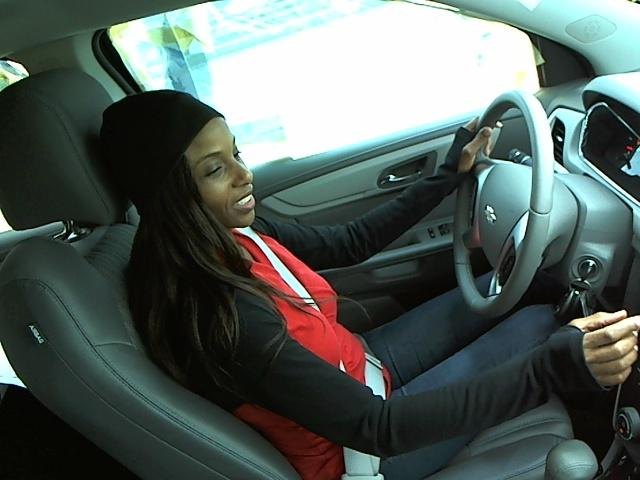

In [13]:
from PIL import Image
Image.open('/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_68208.jpg')

In [14]:
#주소에 정답값이 있으면 glob 으로 가져야한다/ 정답값이 없으면 csv 로 가져야한다 
train=pd.DataFrame({'path':glob.glob('/kaggle/input/state-farm-distracted-driver-detection/imgs/train/*/*')})
pd.options.display.max_colwidth=200
train


,path
0,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_68208.jpg
1,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_77583.jpg
2,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_49189.jpg
3,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_6690.jpg
4,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_95740.jpg
...,...
22419,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_6087.jpg
22420,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_36959.jpg
22421,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_19429.jpg
22422,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_99342.jpg


In [15]:
train['label']=train['path'].apply(lambda x:x.split('/')[-2])
train


,path,label
0,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_68208.jpg,c5
1,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_77583.jpg,c5
2,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_49189.jpg,c5
3,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_6690.jpg,c5
4,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_95740.jpg,c5
...,...,...
22419,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_6087.jpg,c0
22420,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_36959.jpg,c0
22421,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_19429.jpg,c0
22422,/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_99342.jpg,c0


In [16]:
#folder 만들어서 image 넣기 
os.makedirs('resized_train',exist_ok=True)
for path in train['path']:
    image=cv2.imread(path)
    image=cv2.resize(image,(256,256))
    label=path.split('/')[-2]
    name=path.split('/')[-1]
    cv2.imwrite('resized_train/'+label+'_'+name,image)
    

In [17]:
train=pd.DataFrame({'path':glob.glob("resized_train/*")})
train

,path
0,resized_train/c0_img_85906.jpg
1,resized_train/c0_img_50577.jpg
2,resized_train/c3_img_88690.jpg
3,resized_train/c3_img_47426.jpg
4,resized_train/c6_img_96745.jpg
...,...
22419,resized_train/c7_img_54386.jpg
22420,resized_train/c4_img_96595.jpg
22421,resized_train/c5_img_10202.jpg
22422,resized_train/c3_img_89633.jpg


In [18]:
train['label']=train['path'].apply(lambda x:x.split('/')[-1].split('_')[0])
train

,path,label
0,resized_train/c0_img_85906.jpg,c0
1,resized_train/c0_img_50577.jpg,c0
2,resized_train/c3_img_88690.jpg,c3
3,resized_train/c3_img_47426.jpg,c3
4,resized_train/c6_img_96745.jpg,c6
...,...,...
22419,resized_train/c7_img_54386.jpg,c7
22420,resized_train/c4_img_96595.jpg,c4
22421,resized_train/c5_img_10202.jpg,c5
22422,resized_train/c3_img_89633.jpg,c3


In [19]:
train['label'].nunique()

10

In [20]:
from sklearn.model_selection import train_test_split
#x_train 이랑 x_valid 만 넣는 이유는 train_generator 가 알아서 y 값을 넣어야줘야한다 
x_train,x_valid=train_test_split(train,test_size=0.2,random_state=42)
train['label']=train['label'].astype(str)


from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


#idg 에 train 에 만 넣어도
idg2=ImageDataGenerator()

train_generator=idg.flow_from_dataframe(x_train,x_col='path',y_col='label')
valid_generator=idg2.flow_from_dataframe(x_valid,x_col='path',y_col='label')

2024-03-15 01:45:11.247362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 01:45:11.247464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 01:45:11.366345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 17939 validated image filenames belonging to 10 classes.
Found 4485 validated image filenames belonging to 10 classes.


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()
model.add(EfficientNetB1(include_top=False, pooling='avg'))
model.add(Dense(10, activation='softmax'))  
model.compile(metrics=['acc'], optimizer='adam', loss='categorical_crossentropy')

In [25]:
##### model.fit(train_generator, epochs=5)

from tensorflow.keras.callbacks import EarlyStopping

# Add the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

# Fit the model using both the training and validation generators
model.fit(
    train_generator,
    epochs=3,
    validation_data=valid_generator,
    callbacks=[early_stopping]  # Include the EarlyStopping callback here
)

Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1710467800.844266     145 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


561/561 ━━━━━━━━━━━━━━━━━━━━ 496s 629ms/step - acc: 0.7864 - loss: 0.6503 - val_acc: 0.9501 - val_loss: 0.1769
Epoch 2/3
561/561 ━━━━━━━━━━━━━━━━━━━━ 236s 415ms/step - acc: 0.9577 - loss: 0.1425 - val_acc: 0.9565 - val_loss: 0.1363
Epoch 3/3
561/561 ━━━━━━━━━━━━━━━━━━━━ 240s 423ms/step - acc: 0.9612 - loss: 0.1232 - val_acc: 0.9808 - val_loss: 0.0624


In [26]:
sub=pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/sample_submission.csv")
sub

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79722,img_99995.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79723,img_99996.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79724,img_99998.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [29]:
pd.options.display.max_colwidth=200
test=pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/sample_submission.csv")
test=pd.DataFrame({'path':glob.glob('/kaggle/input/state-farm-distracted-driver-detection/imgs/test/*')})
test

,path
0,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_96590.jpg
1,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_32366.jpg
2,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_99675.jpg
3,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_85937.jpg
4,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_73903.jpg
...,...
79721,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_109.jpg
79722,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_53257.jpg
79723,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_90376.jpg
79724,/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_28000.jpg


In [30]:
test_generator=idg2.flow_from_dataframe(test, x_col='path', y_col=None, shuffle=False, class_mode=None )


Found 79726 validated image filenames.


In [31]:
result=model.predict(test_generator)
result


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1522/2492 ━━━━━━━━━━━━━━━━━━━━ 5:51 363ms/step

KeyboardInterrupt: 

In [32]:
sub.iloc[:,1:]=result

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...
79721,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79722,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79723,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79724,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
